# Breast Cancer Biopsy Data Classification

In [199]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the Data

df = pd.read_csv(
    filepath_or_buffer='http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',
    header=None,
    sep=',')

df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [200]:
# Add the column names to each variable

column_names = ['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
                'concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se',
                'perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se',
                'fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst',
                'compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']
len(column_names)

32

In [201]:
df = df.set_axis(column_names, axis=1, inplace=False)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [202]:
# Looking for missing or null data points

df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [209]:
# 30 out of the 32 Variables are numerical variables measuring various sizes of the cell
# id variable will be removed later on because it doesn't provide any information to estimate cancer diagnosis
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [207]:
# Target Variable

pd.DataFrame(df.diagnosis.value_counts())

,diagnosis
B,357
M,212


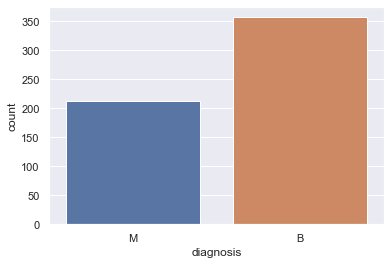

In [306]:
sns.countplot(df['diagnosis'],label="Sum")

plt.show()

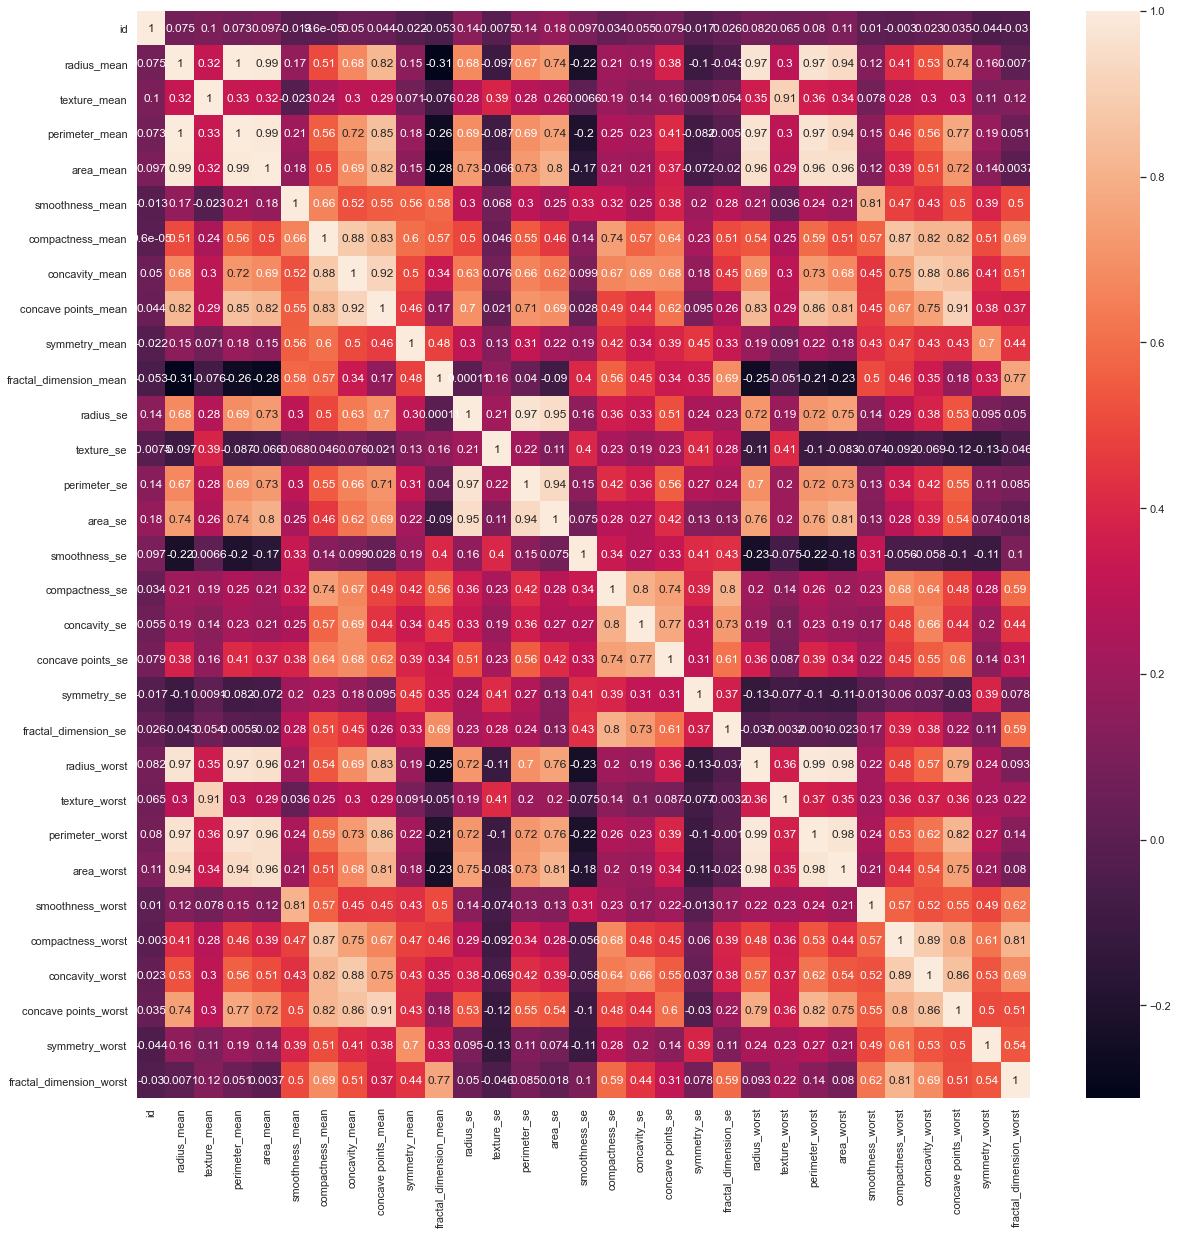

In [218]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
sns.set(rc={'figure.figsize':(30,30)})
plt.show()

See pockets of heavy correlation with one another. This is apparent with radius_mean, perimeter_mean, area_mean, radius_worst, perimeter_worst, and area_worst all being correlated with one another. Another group of correlations is radius_se, perimeter_se, and area_se. I will just keep radius_mean as well as radius_se and elminate the other variables to prevent multicollinearity.

In [221]:
# Elmination of 7 variables
df = df.drop(columns=['perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'perimeter_se', 'area_se'])
df

,id,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,0.01587,0.03003,0.006193,17.33,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,0.01340,0.01389,0.003532,23.41,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,0.02058,0.02250,0.004571,25.53,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,0.01867,0.05963,0.009208,26.50,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,0.01885,0.01756,0.005115,16.67,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,0.02454,0.01114,0.004239,26.40,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,0.01678,0.01898,0.002498,38.25,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,0.01557,0.01318,0.003892,34.12,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,0.01664,0.02324,0.006185,39.42,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [222]:
# Removing column 1 from the data because those are ID values and do not add to the analysis
# Also assigning the target and response variables

X = df.iloc[:,2:24].values
y = df.iloc[:,1].values

print(X)
print(y)

[[17.99    10.38     0.1184  ...  0.7119   0.2654   0.4601 ]
 [20.57    17.77     0.08474 ...  0.2416   0.186    0.275  ]
 [19.69    21.25     0.1096  ...  0.4504   0.243    0.3613 ]
 ...
 [16.6     28.08     0.08455 ...  0.3403   0.1418   0.2218 ]
 [20.6     29.33     0.1178  ...  0.9387   0.265    0.4087 ]
 [ 7.76    24.54     0.05263 ...  0.       0.       0.2871 ]]
['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'

In [223]:
# Standardizing the data

X_std = StandardScaler().fit_transform(X)

In [224]:
# Covariance Matrix Calulation

mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00176056e+00  3.24351929e-01  1.70881506e-01  5.07014640e-01
   6.77955036e-01  8.23976636e-01  1.48001350e-01 -3.12179472e-01
   6.80285970e-01 -9.74887767e-02 -2.22992026e-01  2.06362656e-01
   1.94545531e-01  3.76831225e-01 -1.04504545e-01 -4.27163418e-02
   2.97530545e-01  1.19826732e-01  4.14190751e-01  5.27839123e-01
   7.45524434e-01  1.64241985e-01]
 [ 3.24351929e-01  1.00176056e+00 -2.34296930e-02  2.37118951e-01
   3.02950254e-01  2.93980713e-01  7.15266864e-02 -7.65717560e-02
   2.76354360e-01  3.87037830e-01  6.62542133e-03  1.92312595e-01
   1.43545353e-01  1.64139495e-01  9.14323671e-03  5.45533955e-02
   9.13650301e-01  7.76398084e-02  2.78318729e-01  3.01555198e-01
   2.95835766e-01  1.05192783e-01]
 [ 1.70881506e-01 -2.34296930e-02  1.00176056e+00  6.60283643e-01
   5.22902753e-01  5.54669988e-01  5.58756786e-01  5.85821565e-01
   3.01997850e-01  6.85268821e-02  3.32960611e-01  3.19504817e-01
   2.48832996e-01  3.81345895e-01  2.01127852e-01  2.

In [225]:
# Eigendecomposition on the covariance matrix to find eiganvalues

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 1.74842703e-01 -3.78256536e-01  1.28781572e-01  1.97942896e-01
   2.23931121e-01  3.83836471e-02  5.59451933e-04 -1.21218636e-01
   1.51792943e-02  9.22343851e-02  5.91974124e-02 -9.00462397e-02
   4.00079837e-01  1.43360256e-01 -2.53754645e-01  7.82372970e-02
   6.13748496e-01 -1.01702493e-02  4.76836193e-02  1.33158785e-01
   1.89161953e-01  1.47155313e-02]
 [ 1.04581895e-01 -1.91199561e-01  3.81566702e-01 -4.20583788e-01
  -1.37360681e-01 -4.55333816e-02  9.23265781e-02 -1.37096252e-01
  -2.97062028e-01  4.39739635e-02 -2.93306737e-01 -2.71593540e-01
  -1.03666849e-01  4.60672858e-02  1.51905503e-01  1.79218272e-02
   9.52523814e-02  8.35474638e-02 -6.25380023e-02 -1.19508991e-01
  -1.12785231e-01  4.98554532e-01]
 [ 2.09670859e-01  1.03296608e-01 -2.68881712e-01 -1.39937491e-01
   3.13405377e-01 -2.82022962e-01 -2.01350228e-01  1.68723208e-01
   8.25539971e-02 -2.24206323e-02 -3.37182330e-01 -1.29355465e-01
  -2.49275748e-02  5.10658741e-01  1.93036520e-02  7.40014

In [226]:
# Ranking the eigenvalues from highest to lowest in order choose the top k eigenvectors

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])


Eigenvalues in descending order:
9.44134469346489
3.2302374660604762
2.3149986512356184
1.7985065199986041
1.4035809099906469
1.1989516189212126
0.48812197429882764
0.4130552110981863
0.3613952903776353
0.28331335550243714
0.2654561431533905
0.2158761399697169
0.19259352520150202
0.14616443260747394
0.0689314015532114
0.053076781163590304
0.04964521555501774
0.03393559806745148
0.030154017113431988
0.0237868703005319
0.017361566186387796
0.008245012545949015


In [227]:
# Determine number of principal components needed by finding out the each 
# principal component's variability and cumulative variability

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

print('The Individual Variabilities are:\n', var_exp)
print('\nThe Cumulative Variabilities are:\n', cum_var_exp)

The Individual Variabilities are:
 [42.83978100246093, 14.657092832100584, 10.504227783206836, 8.160662273200252, 6.368700725952131, 5.440202265116225, 2.2148368860978924, 1.8742239966749472, 1.6398188603171189, 1.2855247317892984, 1.204498237027687, 0.9795306558779298, 0.8738865818377791, 0.6632161505116251, 0.3127738942500726, 0.2408340925141341, 0.22526348007069888, 0.15398162407982463, 0.13682282888983363, 0.10793211639800386, 0.07877751712628432, 0.037411464499912464]

The Cumulative Variabilities are:
 [ 42.839781    57.49687383  68.00110162  76.16176389  82.53046462
  87.97066688  90.18550377  92.05972776  93.69954663  94.98507136
  96.18956959  97.16910025  98.04298683  98.70620298  99.01897688
  99.25981097  99.48507445  99.63905607  99.7758789   99.88381102
  99.96258854 100.        ]


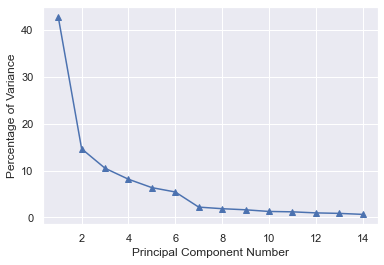

In [229]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 15), var_exp[:14], marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

I would keep __10 principal components__ so that I will be able to have ~95% of the variability of the data. I was able to bring 31 variables at the beginning of the data down to 10 principal components by using PCA and removing highly correlated variables to reduce multicollinearity.

__Logistic Regression__ to Predict the Diagnosis (M = malignant, B = benign) by splitting the data into train and test:

In [230]:
#Encoding categorical data values

from sklearn.preprocessing import LabelEncoder
from scipy import stats

labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(y)
Y

# 1 is 'M' and '0' is B from the past data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [231]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)



In [232]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [233]:
# Using Logistic Regression Algorithm to the Training Set

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [234]:
Y_pred = classifier.predict(X_test)

In [235]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)
cm

array([[106,   2],
       [  3,  60]], dtype=int64)

In [236]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



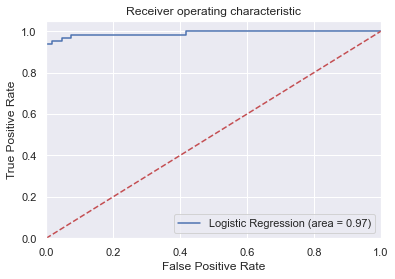

In [237]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: ')

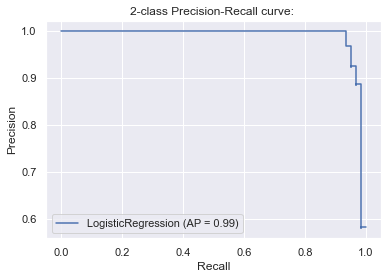

In [238]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ')

__KNN__

In [239]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [2,3,4,5,10,20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    verbose = 1,
    cv = 3,
    n_jobs = -1
)

In [240]:
knn_results = knn.fit(X_train, Y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.0s finished


In [241]:
knn_results.best_score_

0.9472544998860788

In [242]:
knn_results.best_params_

{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}

In [244]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', weights = 'uniform')
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [245]:
Y_pred = classifier.predict(X_test)

In [246]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[106,   2],
       [  7,  56]], dtype=int64)

In [247]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       108
           1       0.97      0.89      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



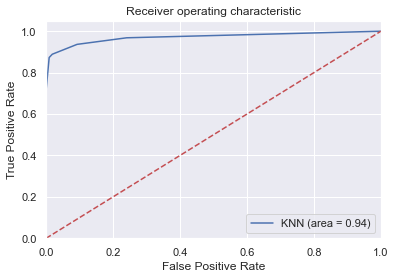

In [248]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: ')

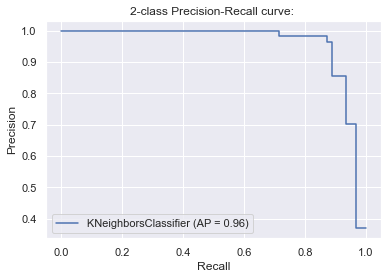

In [249]:
disp = plot_precision_recall_curve(classifier, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ')

__Decision Trees__

In [250]:
#Using Decision Tree Algorithm to the Training Set

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [251]:
Y_pred = classifier.predict(X_test)

In [252]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[99,  9],
       [ 4, 59]], dtype=int64)

In [253]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       108
           1       0.87      0.94      0.90        63

    accuracy                           0.92       171
   macro avg       0.91      0.93      0.92       171
weighted avg       0.93      0.92      0.92       171



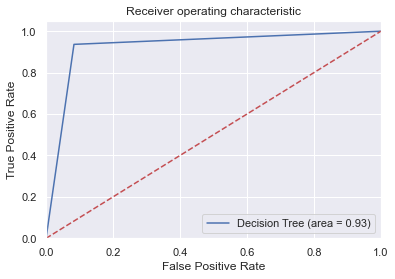

In [254]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: ')

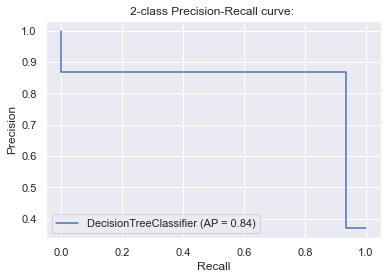

In [255]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ')

__Random Forest__

In [256]:
# Grid Search with Cross Validation using values from Randomized Search
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [45, 50, 55],
    'max_features': [4, 5, 6],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [1, 2, 3],
    'n_estimators': [700, 800, 900]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [257]:
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed:  3.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [258]:
grid_search.best_score_

0.8280889232714078

In [259]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 45,
 'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 700}

In [260]:
# Use the best hyperparameters found from the Grid Search
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(bootstrap=True, max_depth=45, max_features=6,
                       min_samples_leaf=1, min_samples_split=2,
                       n_estimators=700, random_state=42)
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=45, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



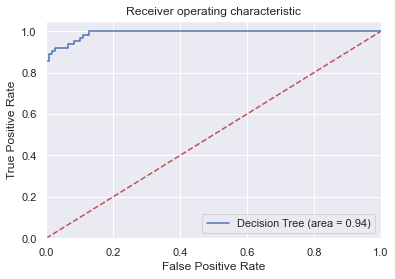

Text(0.5, 1.0, '2-class Precision-Recall curve: ')

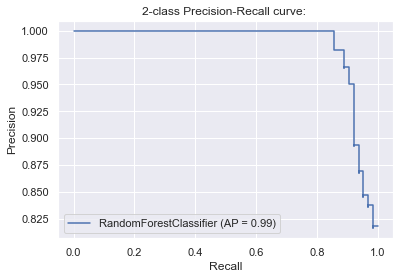

In [261]:
# Summarize the results of the Random Forest using the optimal hyperparameters

Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)

from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ')

In [262]:
cm

array([[106,   2],
       [  6,  57]], dtype=int64)

__Support Vector Machines__

In [263]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Linear SVC

def svc_param_selection(X_train, Y_train, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [264]:
%%time

svc_param_selection(X_train, Y_train, 5)

Wall time: 752 ms


{'C': 10, 'gamma': 0.001}

In [265]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear',gamma=0.001, C = 10)

In [266]:
%%time

classifier.fit(X_train, Y_train)

Wall time: 3 ms


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [267]:
%%time

svc_pred = classifier.predict(X_test)
svc_pred

Wall time: 999 µs


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

[[101   7]
 [  3  60]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       108
           1       0.90      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



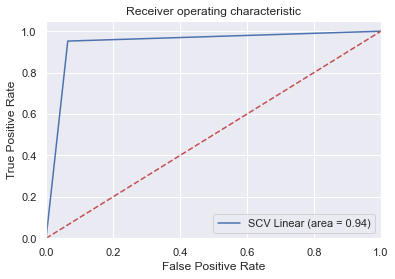

Text(0.5, 1.0, '2-class Precision-Recall curve: ')

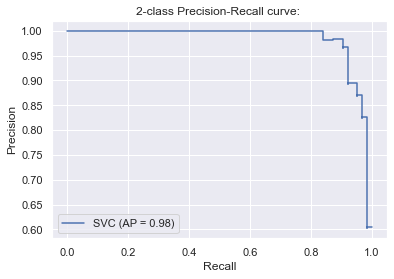

In [268]:
cm = confusion_matrix(Y_test, svc_pred)

print(cm)
print(classification_report(Y_test, svc_pred))

logit_roc_auc = roc_auc_score(Y_test, svc_pred)
fpr, tpr, thresholds = roc_curve(Y_test, svc_pred)
plt.figure()
plt.plot(fpr, tpr, label='SCV Linear (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ')

In [269]:
# Polynomical SVC - There is no GridSearch available for the polynomial kernel so will try some values manually

classifier = SVC(kernel='poly',gamma=0.001, C = 10, degree = 2, decision_function_shape='ovo')

In [270]:
%%time

classifier.fit(X_train, Y_train)

Wall time: 7 ms


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=2, gamma=0.001, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [271]:
%%time

svc_pred = classifier.predict(X_test)
print(svc_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Wall time: 2 ms


In [272]:
cm = confusion_matrix(Y_test, svc_pred)
cm

array([[108,   0],
       [ 61,   2]], dtype=int64)

In [273]:
classifier = SVC(kernel='poly',gamma=0.001, C = 1, degree = 2, decision_function_shape='ovo')

In [274]:
%%time

classifier.fit(X_train, Y_train)

Wall time: 5 ms


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=2, gamma=0.001, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [275]:
%%time

svc_pred = classifier.predict(X_test)
print(svc_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Wall time: 3 ms


In [276]:
cm = confusion_matrix(Y_test, svc_pred)
cm

array([[108,   0],
       [ 63,   0]], dtype=int64)

In [277]:
classifier = SVC(kernel='poly',gamma=0.001, C = 1, degree = 3, decision_function_shape='ovo')

In [278]:
%%time

classifier.fit(X_train, Y_train)

Wall time: 5 ms


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.001, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [279]:
%%time

svc_pred = classifier.predict(X_test)
print(svc_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Wall time: 2 ms


In [280]:
cm = confusion_matrix(Y_test, svc_pred)
cm

array([[108,   0],
       [ 63,   0]], dtype=int64)

[[108   0]
 [ 61   2]]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       108
           1       1.00      0.03      0.06        63

    accuracy                           0.64       171
   macro avg       0.82      0.52      0.42       171
weighted avg       0.77      0.64      0.52       171



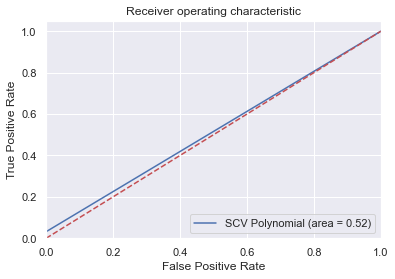

Text(0.5, 1.0, '2-class Precision-Recall curve: ')

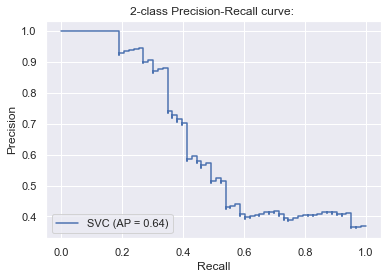

In [281]:
classifier = SVC(kernel='poly',gamma=0.001, C = 10, degree = 2, decision_function_shape='ovo')
classifier.fit(X_train, Y_train)
svc_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, svc_pred)

print(cm)
print(classification_report(Y_test, svc_pred))

logit_roc_auc = roc_auc_score(Y_test, svc_pred)
fpr, tpr, thresholds = roc_curve(Y_test, svc_pred)
plt.figure()
plt.plot(fpr, tpr, label='SCV Polynomial (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

disp = plot_precision_recall_curve(classifier, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ')

In [282]:
# Radial Basis Function SVC

def svc_param_selection(X_train, Y_train, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [283]:
%%time

svc_param_selection(X_train, Y_train, 5)

Wall time: 925 ms


{'C': 10, 'gamma': 0.01}

In [284]:
classifier = SVC(kernel='rbf',gamma=0.01, C = 10, decision_function_shape='ovo')

In [285]:
%%time

classifier.fit(X_train, Y_train)

Wall time: 4 ms


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [286]:
%%time

svc_pred = classifier.predict(X_test)
svc_pred

Wall time: 0 ns


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [287]:
cm = confusion_matrix(Y_test, svc_pred)
cm

array([[107,   1],
       [  3,  60]], dtype=int64)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



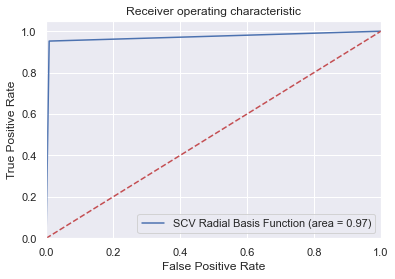

Text(0.5, 1.0, '2-class Precision-Recall curve: ')

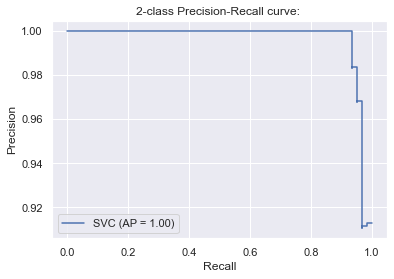

In [288]:

print(classification_report(Y_test, svc_pred))

logit_roc_auc = roc_auc_score(Y_test, svc_pred)
fpr, tpr, thresholds = roc_curve(Y_test, svc_pred)
plt.figure()
plt.plot(fpr, tpr, label='SCV Radial Basis Function (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ')

The best Support Vector Classification was with the Radial Basis Function (rbf) kernel!

# Summary:
__1. Logistic Regression:__
<br> Accuracy: .97
<br> Confusion Matrix: <br> 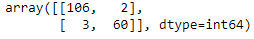
<br> ROC Curve: .97
<br> Precision Recall Curve: .99

__2. KNN (k-Nearest Neighbors):__
<br> Accuracy: .95
<br> Confusion Matrix: <br> 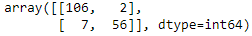
<br> ROC Curve: .94
<br> Precision Recall Curve: .96

__3. Decision Tree:__
<br> Accuracy: .92
<br> Confusion Matrix:  <br> 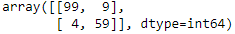
<br> ROC Curve: .93 
<br> Precision Recall Curve: .84

__4. Random Forrest:__
<br> Accuracy: .95
<br> Confusion Matrix:  <br> 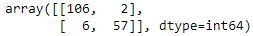
<br> ROC Curve: .94
<br> Precision Recall Curve: .99

__5. Support Vector Machine (Radial Basis Function kernel):__
<br> Accuracy: .98
<br> Confusion Matrix:  <br> 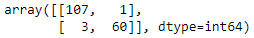
<br> ROC Curve: .97
<br> Precision Recall Curve: 1

__Which model is better?__
We can see by all metrics that the Support Vector Machine regression is better than the other models. In the case of cancer we need to make sure do not miss any malignancies so we would be way happier with False Positives than getting a False Negative. In this example though, the Support Vector Machine regression and Logistric regression had the same number of False Positives (4) but different number of False Negatives (1 vs 2). So it is a no brainer that we would pick the upport Vector Machine regression model. Furthermore, in the data, there are 212 Malignant cases out of 569 total cases. This is somewhat balanced, but has more benign cases in the data. When you have a balanced distribution, you want to use ROC while Precision Recall Curve would be better in a non-balanced distribution. I would put more stock into the ROC values in this situation. Both the Support Vector Machine regression and Logistric regression models have the same ROC curve value but the Precision Recall Curve is better in the Support Vector Machine regression.

I will try to make a combined model using the Logistic and Random Forest Regressions as the base layer. The second layer will have a Support Vector Machine regression. I am hoping this stacked architecture will allow a make a better prediction than any of the individual prediction models by themselves.

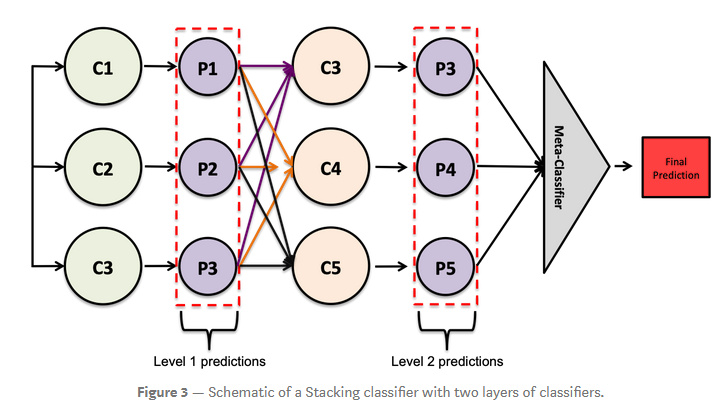
Diagram from https://towardsdatascience.com/stacking-classifiers-for-higher-predictive-performance-566f963e4840

In [293]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut

In [294]:
# Create Base Learners
base_learners = [
                 ('rf_1', LogisticRegression(random_state = 0)),
                 ('rf_2', RandomForestClassifier(bootstrap=True, max_depth=45, max_features=6,
                       min_samples_leaf=1, min_samples_split=2,
                       n_estimators=700, random_state=42))             
                ]

In [295]:
clf = StackingClassifier(estimators=base_learners, final_estimator=SVC(kernel='rbf',gamma=0.01, C = 10, decision_function_shape='ovo'))

In [296]:
clf.fit(X_train, Y_train).score(X_test, Y_test)

0.9707602339181286

This was a stacking architecture where the first layer (level 1) had a Random Forest and k-nearest neighbors algorithms applied to the data set. Next a Gradient Boosting Classifier was conducted on the dataset. The overall result of the data was 97.1% accuracy which seems a bit disappointing when looking at the individual results seen in question 4 with the Gradient Boosting Classifier by itself having 98.2% accuracy. 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



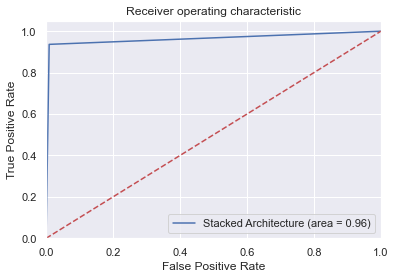

Text(0.5, 1.0, '2-class Precision-Recall curve: ')

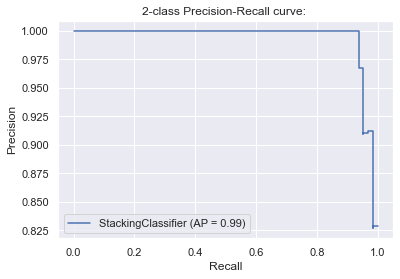

In [304]:
classifier = clf
classifier.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)


print(classification_report(Y_test, Y_pred))


logit_roc_auc = roc_auc_score(Y_test, Y_pred)
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Stacked Architecture (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

disp = plot_precision_recall_curve(classifier, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ')

In [298]:
cm

array([[107,   1],
       [  4,  59]], dtype=int64)

__6. Stacked Architecture:__
<br> Accuracy: .97
<br> Confusion Matrix: <br> 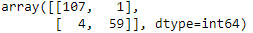
<br> ROC Curve: .96
<br> Precision Recall Curve: .99

This was a stacking architecture where the first layer (level 1) had a Logistic Regression and Random Forest algorithms applied to the data set. Next a Support Vector Machine Regression was conducted on the dataset. The overall result of the data was 97.1% accuracy which seems a bit disappointing when looking at the individual results seen in above. I expected the combined ensemble classication to do a better job than the individual regression models. The final model was able to perform better than the Logistic and Random Forest Regressions, but was not better than the Support Vector Machine Regression.